In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [2]:
raw_df=pd.read_csv('simulated_reponse_2023-01-03.csv')

In [3]:
raw_df.columns

Index(['Company', 'Emlpoyee ID', 'Role', 'Tier', 'Element', 'Question Type',
       'Question', 'Question num', 'Numeric Response', 'Response'],
      dtype='object')

In [4]:
#defining weights dict
#This is based on Question Type
csf_weight_dict={
    'Information':0.6,
    'Behavior':0.3,
    'Benefit':0.1
}

role_tier_dict = {
    ('Executive','Executive' ): 4,
    ('Executive','Operational' ): 3,
    ('Executive','Transactional' ): 1,
    ('Operational','Executive' ): 3,
    ('Operational','Operational' ): 4,
    ('Operational','Transactional' ): 3,
    ('Transactional','Executive' ): 1,
    ('Transactional','Operational' ): 3,
    ('Transactional','Transactional' ): 4
}

score_dict={
    'Disagree': 2,
    'Somewhat disagree': 4,
    'Somewhat agree': 7,
    'Agree': 10
}

element_dict={
    'STRATEGY / Credibility': 1,
    'BUS ARCH / Transitions': 1,
    'AGILITY / Systems': 1,
    'PORTFOLIO / Progress': 2,
    'CONFIG’N / Orchestration': 2,
    'VALUE NTWKG / Execution': 2,
    'CAMPAIGN / Engagement': 3,
    'DESIGN / Scope': 3,
    'STAKEHOLDER ROI / Feedback': 3,
    'KNOWL MGMT / Transparency': 4,
    'DEV / Completeness': 4,
    'CAPABILITY MATURITY / Learning': 4
}


In [5]:
# create a NumPy array of weights corresponding to the types in the dataframe
raw_df['csf_weight'] = raw_df['Question Type'].map(csf_weight_dict)

In [6]:
#mapping to role_weights
role_tier_weights = np.array([role_tier_dict.get((row['Role'], row['Tier']), np.nan) for _, row in raw_df.iterrows()])

# add new column to df based on role_weights array
raw_df['Role_Weight'] = role_tier_weights
#raw_df['Role_Weight'] = raw_df.apply(lambda x: role_tier_dict.get((x['Role'], x['Tier']), np.nan), axis=1)


In [7]:
#mapping to score_weight
raw_df['Score'] = raw_df['Response'].map(score_dict)

In [8]:
#mapping to Element_sno_ for visualization
raw_df['Element_Sno'] = raw_df['Element'].map(element_dict)

In [9]:
raw_df['Final_Score']=raw_df['Score']*raw_df['Role_Weight']*raw_df['csf_weight']

In [10]:
#company , employee,role,tier,element wise total of final score
group_1_df=raw_df.groupby(by=['Company','Emlpoyee ID','Role','Tier','Element','Element_Sno'])['Final_Score'].sum()

In [11]:
#company, role,tier,element wise Average of fina score
group_2_df=group_1_df.groupby(by=['Company','Role','Tier','Element','Element_Sno']).mean().rename('Mean Final Score').reset_index()
group_2_df.index = range(1, len(group_2_df)+1)
group_2_df.head(5)

,Company,Role,Tier,Element,Element_Sno,Mean Final Score
1,Company A,Executive,Executive,CAMPAIGN / Engagement,3,22.84
2,Company A,Executive,Executive,KNOWL MGMT / Transparency,4,18.80
3,Company A,Executive,Executive,PORTFOLIO / Progress,2,27.32
4,Company A,Executive,Executive,STRATEGY / Credibility,1,29.08
5,Company A,Executive,Operational,BUS ARCH / Transitions,1,19.29


In [13]:
# Create a new DataFrame for each role
Executive_data = group_2_df[group_2_df['Role'] == 'Executive']
Operational_data = group_2_df[group_2_df['Role'] == 'Operational']
Transactional_data = group_2_df[group_2_df['Role'] == 'Transactional']

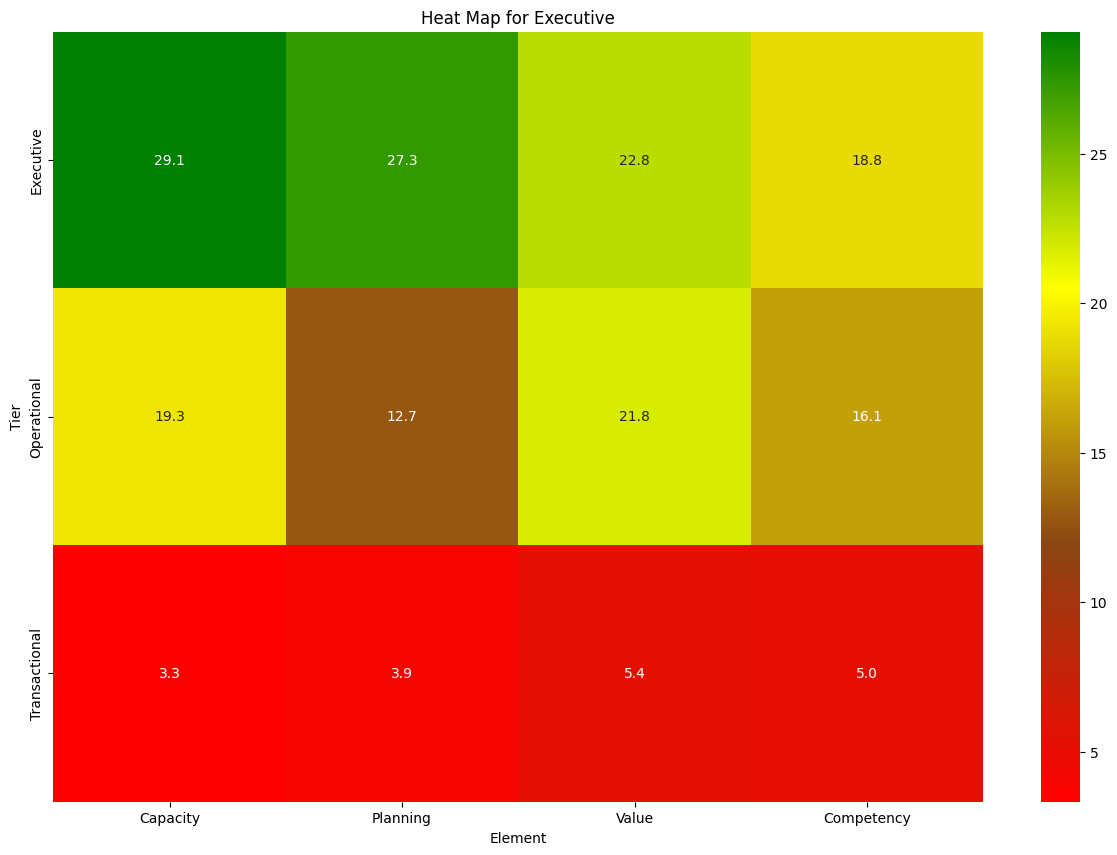

In [14]:
#Executive
x_labels=['Capacity','Planning','Value','Competency']
plt.figure(figsize=(15, 10))

# Define the color map
cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "saddlebrown", "yellow", "green"]) #this is diverging

# Plot the heatmap for Executive
sns.heatmap(Executive_data.pivot_table(values='Mean Final Score', index='Tier', columns='Element_Sno'),
                 annot=True, fmt='.1f', cmap=cmap,xticklabels=x_labels)
plt.title('Heat Map for Executive')
plt.xlabel('Element')
plt.ylabel('Tier')
plt.show()


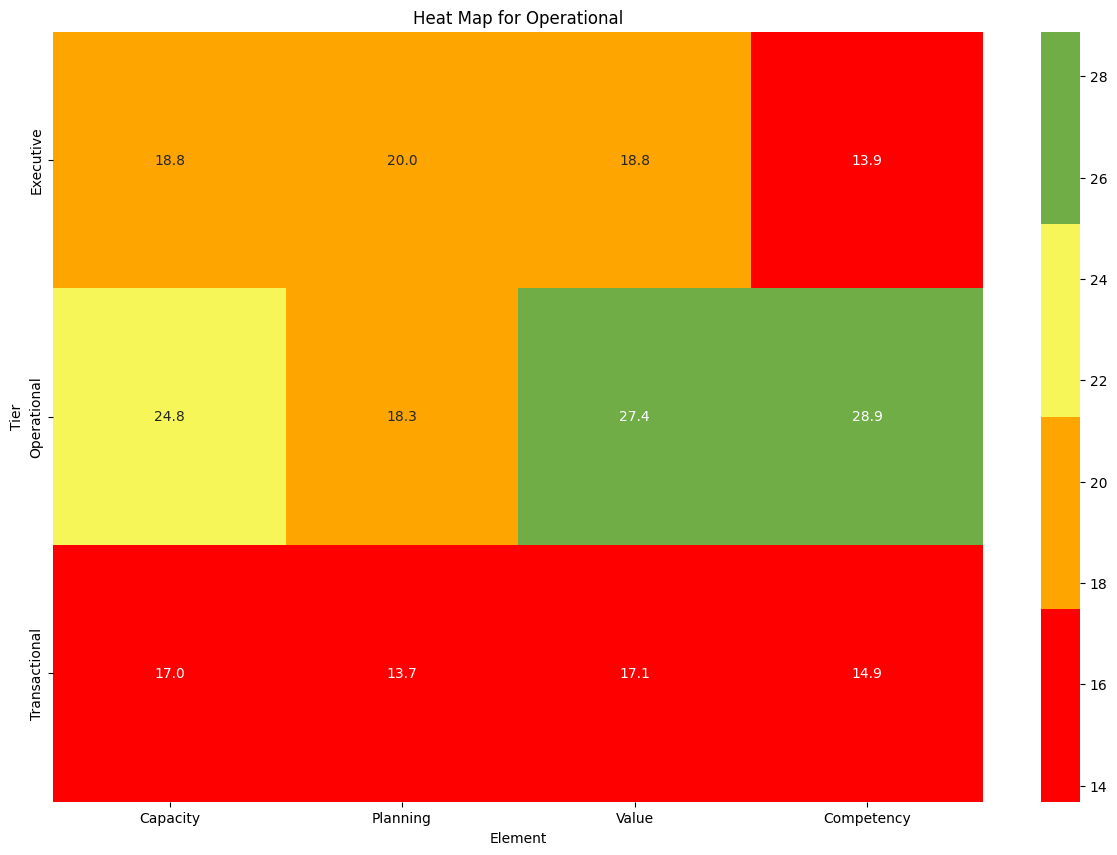

In [15]:
#Operational
plt.figure(figsize=(15, 10))
cmap = mcolors.ListedColormap(["#FF0000", "#FFA500", "#F6F658", "#70AD47"]) #this is 4 fixed colors
#FFA500-orange
#8B4513-brown
sns.heatmap(Operational_data.pivot_table(values='Mean Final Score', index='Tier', columns='Element_Sno'),
                 annot=True, fmt='.1f', cmap=cmap,xticklabels=x_labels)
plt.title('Heat Map for Operational')
plt.xlabel('Element')
plt.ylabel('Tier')
plt.show()



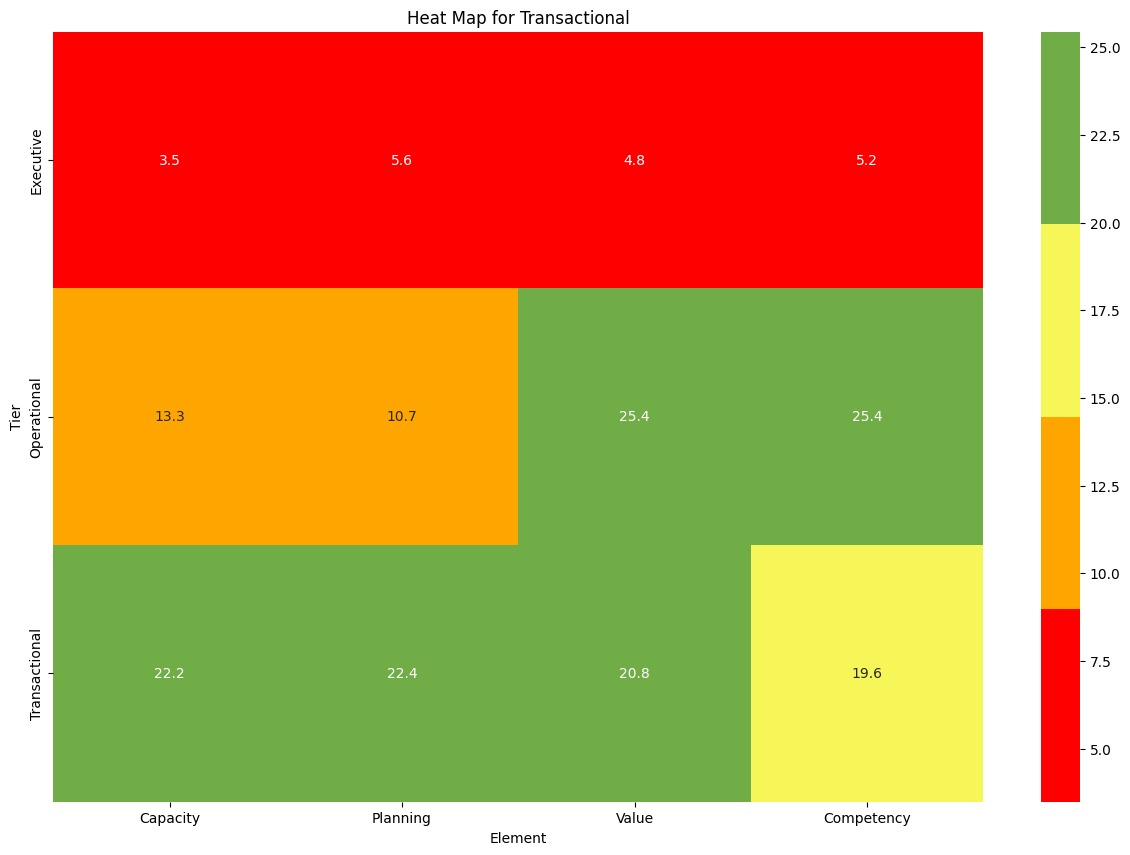

In [16]:
#Transactional
plt.figure(figsize=(15, 10))
sns.heatmap(Transactional_data.pivot_table(values='Mean Final Score', index='Tier', columns='Element_Sno'),
                 annot=True, fmt='.1f', cmap=cmap,xticklabels=x_labels)
plt.title('Heat Map for Transactional')
plt.xlabel('Element')
plt.ylabel('Tier')
plt.show()